In [1]:
from pylab import *
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Ecuación de Van der Pol

$$
y''- mu (1-y^2)y' + y=0
$$

In [2]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [3]:
def vanderpol (p_ini,t,mu):
    dy = p_ini [1] #y1
    dy1 = mu*(1-p_ini[0]*p_ini[0])*p_ini[1]-p_ini[0]
    return array([dy,dy1])

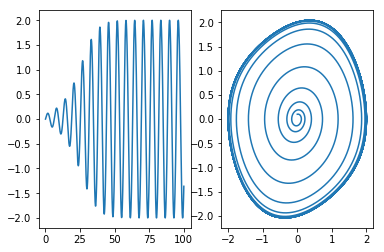

In [6]:
mu=0.2
t=[0,100]
p_ini=[0,0.1]
tiempo,sol=rk4_a(vanderpol,p_ini,t,mu)
plt.subplot(1,2,1)
plot(tiempo,sol[:,0])
plt.subplot(1,2,2)
plot (sol[:,0],sol[:,1])

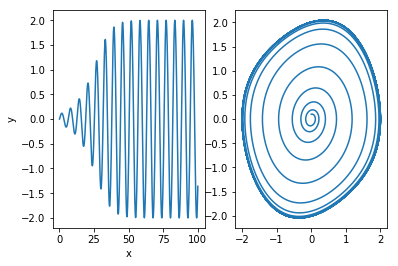

In [7]:
plt.subplot(1,2,1)
plot(tiempo,sol[:,0])
ylabel('y')
xlabel('x')
plt.subplot(1,2,2)
plot (sol[:,0],sol[:,1])

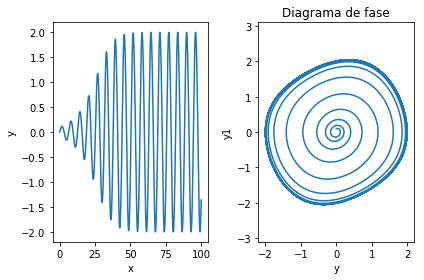

In [9]:
plt.subplot(1,2,1)
plot(tiempo,sol[:,0])
ylabel('y')
xlabel('x')
plt.subplot(1,2,2)
plot (sol[:,0],sol[:,1])
ylabel('y1')
xlabel('y')
title ('Diagrama de fase')
axis('equal')
plt.tight_layout()

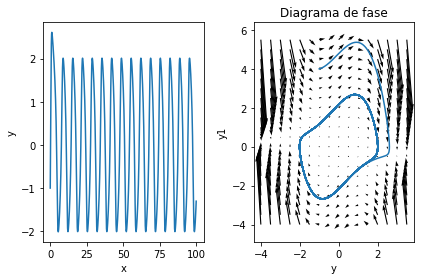

In [10]:
mu=1
t=[0,100]
p_ini=[-1,4]
tiempo,sol=rk4_a(vanderpol,p_ini,t,mu)
xaxis,yaxis=np.meshgrid(np.arange(-4,4,0.5),np.arange(-4,6,0.5))
plt.subplot(1,2,1)
plot(tiempo,sol[:,0])
ylabel('y')
xlabel('x')
plt.subplot(1,2,2)
plot (sol[:,0],sol[:,1])
quiver (xaxis,yaxis,yaxis,mu*(1-xaxis*xaxis)*yaxis-xaxis,scale=150,width=0.007)
ylabel('y1')
xlabel('y')
title ('Diagrama de fase')
axis('equal')
plt.tight_layout()